In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
class ConstantSchedule:
    def __init__(self, lr: float) -> None:
        """
        Constant learning rate
        """
        self.lr = lr

    def __call__(self, progress_remaining: float) -> float:
        return self.lr

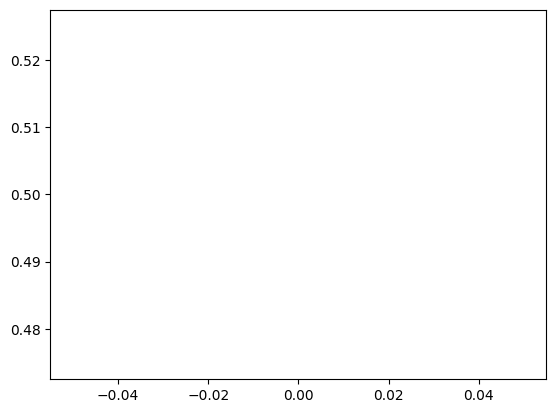

In [52]:
cs = ConstantSchedule(lr=0.5)
vfunc = np.vectorize(cs)
plt.plot(np.linspace(0.0, 0.0, 100), vfunc(np.linspace(1.0, 0.0, 100)))

In [53]:
class LinearSchedule:
    """ 
    Decreases learning rate linearly between start and end lr
    """
    def __init__(self, start_lr: float, end_lr: float) -> None:
        self.start_lr = start_lr
        self.end_lr = end_lr

    def __call__(self, progress_remaining: float) -> float:
        # current progress != lr
        # 1 != start_lr
        # 0 != end_lr
        # --> lr = start_lr + (1-progress_remaining) * (end_lr - start_lr)
        #  example: start: 0.5, end 0.1
        # -> 0.5 = 0.5 + (1-1)*(0.1-0.5) = 0.5 + 0*(-0.4) = 0.5 
        # -> 0.1 = 0.5 + (1-0)*(0.1-0.5) = 0.5 + 1*(-0.4) = 0.1
        return self.start_lr + (1.0 - progress_remaining) * (self.end_lr - self.start_lr)

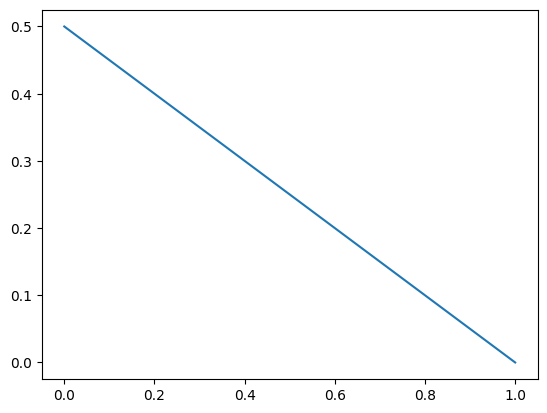

In [54]:
ls = LinearSchedule(start_lr=0.5, end_lr=0.0)
vfunc = np.vectorize(ls)
plt.plot(np.linspace(0.0, 1.0, 100), vfunc(np.linspace(1.0, 0.0, 100)))

In [88]:
class LinearScheduleWithWarmup:
    """ 
    Decreases learning rate linearly between start and end lr
    """
    def __init__(self, start_lr: float, end_lr: float, warmup_fraction: float) -> None:
        self.warmup_fraction = warmup_fraction
        self.start_lr = start_lr
        self.end_lr = end_lr

    def __call__(self, progress_remaining: float) -> float:
        if (1.0 - progress_remaining) <= self.warmup_fraction:
            return (1.0 - progress_remaining) / self.warmup_fraction * self.start_lr
        return self.end_lr + (self.start_lr - self.end_lr)/(1.0 - self.warmup_fraction) * progress_remaining

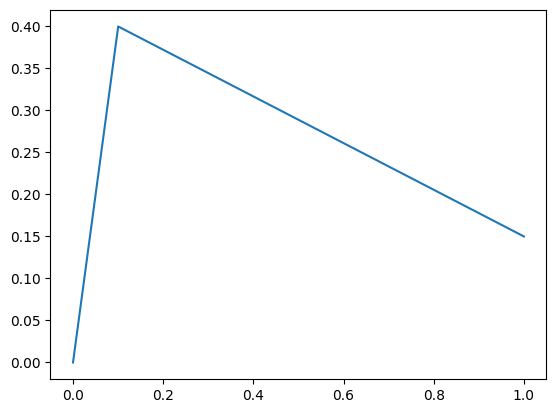

In [92]:
lws = LinearScheduleWithWarmup(start_lr=0.4, end_lr=0.15, warmup_fraction=0.1)
vfunc = np.vectorize(lws)
plt.plot(np.linspace(0.0, 1.0, 500), vfunc(np.linspace(1.0, 0.0, 500)))

In [81]:
import math
class HalfCosineSchedule:
    """ 
    Decreases learning rate linearly between start and end lr
    """
    def __init__(self, start_lr: float,  end_lr: float) -> None:
        self.start_lr = start_lr
        self.end_lr = end_lr

    def __call__(self, progress_remaining: float) -> float:
        # current progress != lr
        # 1 != start_lr
        # 0 != end_lr
        return self.start_lr + ((math.cos((progress_remaining) * math.pi) + 1.0) / 2)  * (self.end_lr - self.start_lr)

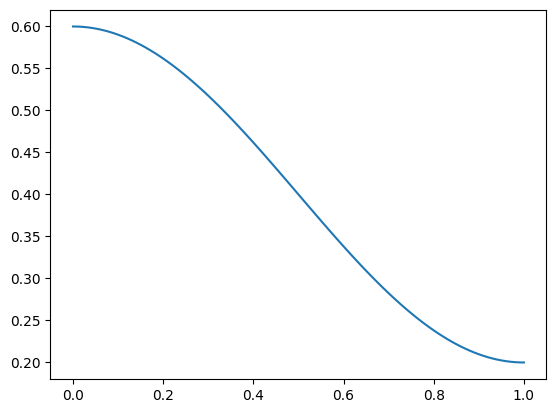

In [46]:
hcs = HalfCosineSchedule(start_lr=0.6, end_lr=0.2)
vfunc = np.vectorize(hcs)
plt.plot(np.linspace(0.0, 1.0, 100), vfunc(np.linspace(1.0, 0.0, 100)))